In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from tensorflow import keras

import matplotlib.pyplot as plt
import numpy as np

In [2]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
# 문제집(2차원행렬), 정답지(1차원행렬)
train_input.shape, train_target.shape

((60000, 28, 28), (60000,))

In [4]:
test_input.shape, test_target.shape

((10000, 28, 28), (10000,))

In [5]:
# 패션과 관련된 데이터(흑백이미지) : 0 : 검은색, 255 : 흰색
train_input[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [6]:
train_target[0]

9

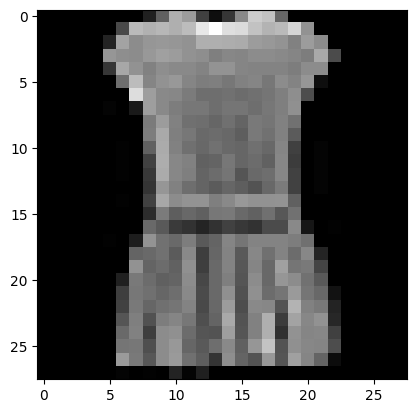

In [7]:
plt.imshow(train_input[3], cmap = 'gray')
plt.show()

In [8]:
train_target[3]

3

In [9]:
# 랜덤포레스트
train_scaled = train_input.reshape(60000, 784) / 255
test_scaled = test_input.reshape(10000, 784) / 255

In [10]:
train_scaled.shape

(60000, 784)

In [11]:
rf = RandomForestClassifier(n_estimators=500) # 결정트리 100개
rf.fit(train_scaled, train_target)
rf.score(test_scaled, test_target)

0.8771

In [12]:
# 랜덤 포레스트 : 87.6%

es = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

model = keras.Sequential() # 도화지
model.add(keras.layers.Dense(512, activation = 'relu', input_shape = (784,)))
model.add(keras.layers.Dense(256, activation = 'relu'))
model.add(keras.layers.Dense(10, activation = 'softmax'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 535818 (2.04 MB)
Trainable params: 535818 (2.04 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = 'adam',
              metrics = 'accuracy')

In [15]:
hist = model.fit(train_scaled, train_target,
                 epochs = 10000, validation_data = (test_scaled, test_target),
                 callbacks = [es])

Epoch 1/10000
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4686 - accuracy: 0.8301 - val_loss: 0.4048 - val_accuracy: 0.8514
Epoch 2/10000
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3541 - accuracy: 0.8684 - val_loss: 0.3715 - val_accuracy: 0.8666
Epoch 3/10000
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3179 - accuracy: 0.8818 - val_loss: 0.3431 - val_accuracy: 0.8767
Epoch 4/10000
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2965 - accuracy: 0.8898 - val_loss: 0.3302 - val_accuracy: 0.8798
Epoch 5/10000
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2790 - accuracy: 0.8952 - val_loss: 0.3640 - val_accuracy: 0.8742
Epoch 6/10000
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2638 - accuracy: 0.9009 - val_loss: 0.3364 - val_accuracy: 0.8764
Epoch 7/10000
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2521 - accuracy: 0.9040 - val_lo

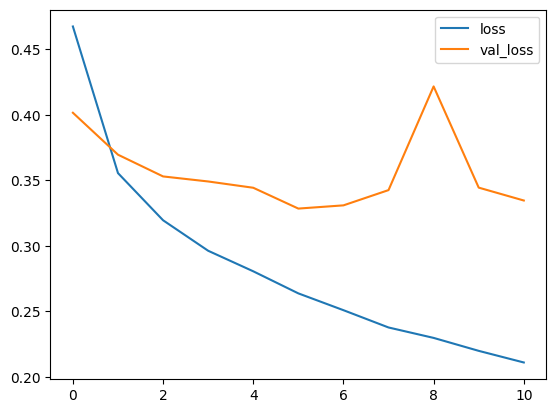

In [44]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.show()

In [45]:
# 랜덤포레스트 : 87.6%
# 인공신경망 : 74%
# 인공신경망(es) : 80%
# 인공신경망(es + 표준화) : 84.6%
# 딥러닝(es + 표준화) : 88.47% > 랜덤포레스트
# CNN 딥러닝 : ?

model.evaluate(test_scaled, test_target)

313/313 [==============================] - 1s 4ms/step - loss: 0.3285 - accuracy: 0.8847


[0.3284721076488495, 0.8847000002861023]

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from tensorflow import keras

import matplotlib.pyplot as plt
import numpy as np

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input.reshape(60000, 28, 28, 1) / 255
test_scaled = test_input.reshape(10000, 28, 28, 1) / 255

model = keras.Sequential()

model.add(keras.layers.Conv2D(128, (3,3), activation = 'relu', padding = "same", input_shape = (28, 28, 1)))
model.add(keras.layers.MaxPooling2D(2))

model.add(keras.layers.Conv2D(64, (3,3), activation = 'relu', padding = "same"))
model.add(keras.layers.MaxPooling2D(2)) # 7x7x64

model.add(keras.layers.Flatten()) #
model.add(keras.layers.Dense(512, activation = 'relu'))
model.add(keras.layers.Dense(10, activation = 'softmax'))

In [49]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 128)       1280      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense_6 (Dense)             (None, 512)              

In [50]:
model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = 'adam',
              metrics = 'accuracy')

In [51]:
hist = model.fit(train_scaled, train_target,
                 epochs = 10000, validation_data = (test_scaled, test_target),
                 callbacks = [es])

Epoch 1/10000
1875/1875 [==============================] - 347s 184ms/step - loss: 0.3691 - accuracy: 0.8655 - val_loss: 0.2808 - val_accuracy: 0.8978
Epoch 2/10000
1875/1875 [==============================] - 347s 185ms/step - loss: 0.2395 - accuracy: 0.9110 - val_loss: 0.2420 - val_accuracy: 0.9127
Epoch 3/10000
 235/1875 [==>...........................] - ETA: 4:37 - loss: 0.1852 - accuracy: 0.9348

KeyboardInterrupt: ignored

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.show()

In [54]:
from sklearn.ensemble import RandomForestClassifier

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input.reshape(-1, 784)
test_scaled = test_input.reshape(-1, 784)

rf = RandomForestClassifier()
rf.fit(train_scaled, train_target)
rf.score(test_scaled, test_target)

0.8759

In [61]:
train_scaled2 = train_scaled[:, :10]
test_scaled2 = test_scaled[:, :10]

rf = RandomForestClassifier()
rf.fit(train_scaled2, train_target)
rf.score(test_scaled2, test_target)

0.2229

In [67]:
# 4개의 특성 -> 2개의 주성분을 찾아서 2개의 특성으로 학습

from sklearn.decomposition import PCA

pca = PCA(n_components=50)
train_scaled2 = pca.fit_transform(train_scaled) # 784개로부터 10개의 주성분
test_scaled2 = pca.transform(test_scaled)

In [63]:
train_scaled2.shape

(60000, 10)

In [64]:
rf = RandomForestClassifier()
rf.fit(train_scaled2, train_target)
rf.score(test_scaled2, test_target)

0.8242

In [68]:
sum(pca.explained_variance_ratio_)

0.8626592733076891

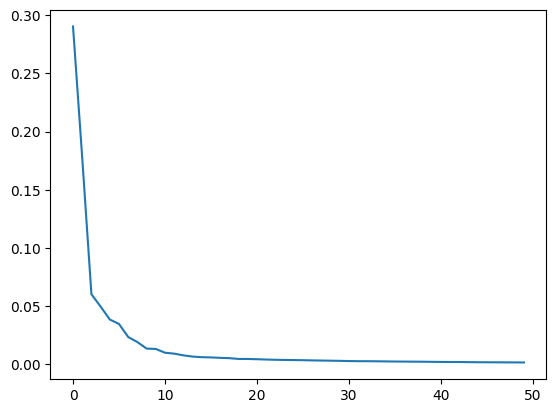

In [69]:
plt.plot(pca.explained_variance_ratio_)

In [78]:
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# 4개의 특성을 2개의 주성분만 찾아서 학습하고 평가
iris = sns.load_dataset("iris")

data = iris.iloc[:, :-1].to_numpy()
target = iris['species'].to_numpy()

train_input, test_input, train_target, test_target = train_test_split(data, target)

pca = PCA(n_components=2) # 개수:개수, 실수:설명력
train_scaled = pca.fit_transform(train_input)
test_scaled = pca.transform(test_input)

rf = RandomForestClassifier()
rf.fit(train_scaled, train_target)
rf.score(test_scaled, test_target)

0.9473684210526315

In [77]:
train_scaled.shape

(112, 3)

In [1]:
import seaborn as sns
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.cluster import KMeans

iris = sns.load_dataset("iris")
del iris['species']

data = iris.to_numpy()

pca = PCA(n_components=2)
data2 = pca.fit_transform(data)

km = KMeans(n_clusters=3)
km.fit(data2)

iris['target'] = km.labels_
iris

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


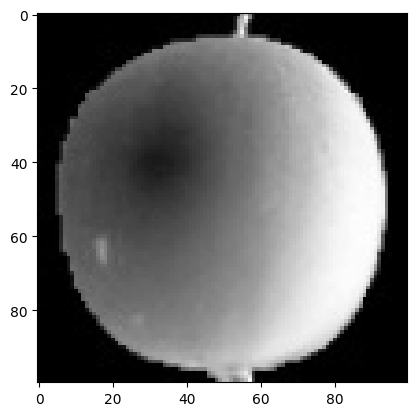

In [102]:
plt.imshow(fruits[0], cmap = 'gray')